![](logo.png)

# Unidad: Regresíon - Sesión 1

### Regresión (desde la econometría)


### Sobre la base de datos

* En esta actividad trabajaremos con un registro de clientes de un banco e información sobre su salud financiera. La base contenida en el csv `Credit` contiene las siguientes variables:

* `Income`: Ingreso anual disponible en miles de dólares.
* `Limit`: Límite del crédito.
* `Rating`: Ranking del crédito.
* `Cards`: Cantidad de tarjetas de credito.
* `Age`: Edad del usuario.
* `Education`: Años de educación del usuario.
* `Gender`: ¿Hombre o mujer?
* `Student`: ¿Es estudiante?
* `Married`: ¿Está casado?
* `Ethnicity`: Etnicidad del usuario (Caucásico, Afroamericano, Asiático)
* `Balance`: Promedio de deuda en tarjeta de crédito de usuario.

* Para efectos prácticos del ejercicio, nos interesa saber sobre los determinantes de la variación en el promedio de deuda en tarjeta de crédito. A lo largo del ejercicio generaremos modelos econométricos para inspeccionar los efectos de distintos atributos.

## Ejercicio 1: Prepare el ambiente de trabajo

* Importe las librerías básicas para el análisis de datos.
* Incluya los import base de `statsmodels`.
* Importe la base de datos `Credit.csv` y elimine la columna `Unnamed: 0`.
* Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de `Ethnicity`, genere binarias para `AfricanAmerican` y `Asian`.
    - _tip_: Utilice `value_counts()` para revisar la cantidad de casos en las variables categóricas.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns


In [15]:
df = pd.read_csv('Credit.csv')


Index(['Unnamed: 0', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [16]:
df = df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
       'Gender', 'Student', 'Married', 'Ethnicity', 'Balance']]

In [68]:
df.head()
df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance', 'AfricanAmerican',
       'Asian'],
      dtype='object')

In [30]:
df['Ethnicity'].value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

In [25]:
df['AfricanAmerican'] = np.where(df['Ethnicity']=='African American',1,0)
df['Asian'] = np.where(df['Ethnicity']=='Asian',1,0)

## Ejercicio 2: Genere gráficos descriptivos para las variables contínuas

* Genere una función llamada `plot_hist` que genere un histograma de la variable e indique la media y mediana de la misma. Agrege una legenda para indicar qué representa cada línea.
* ¿Cuál es el comportamiento de `Balance`, `Income`, `Cards` y `Rating`?

In [63]:
def plot_hist(variable):
    plt.hist(df[variable], color='grey', alpha=.4)
    plt.axvline(df[variable].mean(), color='dodgerblue', linestyle='--', lw=2, label='Media')
    plt.axvline(df[variable].median(), color='tomato', linestyle='-', lw=2, label='Mediana')
    plt.title('Distribución de la variable '+variable)
    plt.legend()

columnas = ['Balance','Income','Cards','Rating']

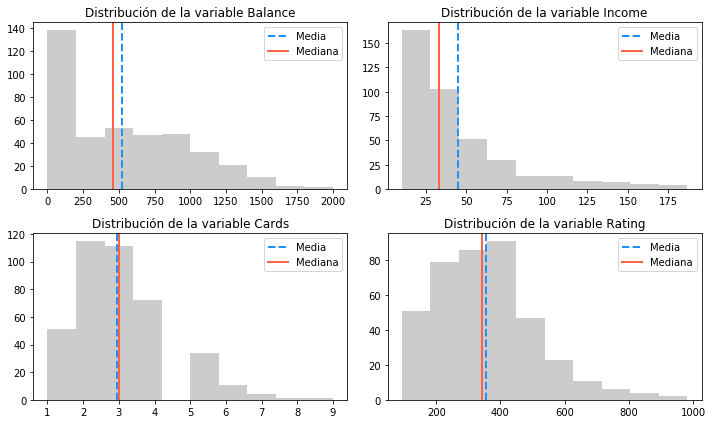

In [64]:
plt.figure(figsize=(10,6))
for i, n in enumerate(columnas):
    
    plt.subplot(2,2,i+1)
    plot_hist(n)
    plt.tight_layout()

Balance e Income, tienen un comportamiento similar, la mayor parte de los datos se acumula en los numeros mas bajos y se aleja de la media. Cards y Rating tienen un comportamiento donde la mayor parte de los datos se acumulan más cerca de la media.

## Ejercicio 3: Regresión Lineal Simple

* A continuación generaremos una serie de modelos simples:

![alttext](eq1.gif)

* Utilizando `statsmodels`, comente brevemente los siguientes puntos:
    - ¿Qué variable presenta un mayor poder explicativo de la variabilidad de `Balance`?
    - ¿Qué podemos decir sobre el comportamiento de `Student`?
        - ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de `Balance` entre aquellos que son y no son estudiantes?

In [47]:
model1 = smf.ols('Balance ~ Student', data=df)
model1 = model1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Tue, 17 Jul 2018   Prob (F-statistic):           1.49e-07
Time:                        20:15:08   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        480.3694     23.434     20.499      0.000     434.300     526.439
Student[T.Yes]   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
model2 = smf.ols('Balance ~ Income', data=df)
model2 = model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Tue, 17 Jul 2018   Prob (F-statistic):           1.03e-22
Time:                        20:16:03   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
model3 = smf.ols('Balance ~ Rating', data=df)
model3 = model3.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Tue, 17 Jul 2018   Prob (F-statistic):          1.90e-120
Time:                        20:43:33   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El ranking crediticio tiene mayor poder explicativo, dado que su R^2 es mayor

In [55]:
def prueba_hipotesis(df, variable, binarize):
    df1 = df[variable][df[binarize]=='Yes'].dropna()
    df2 = df[variable][df[binarize]=='No'].dropna()
    print(variable, binarize)
    print('La media de',binarize,'es',df1.mean())
    print('La media de los que no son',binarize ,df2.mean())
    print('La diferencia de las medias es',(df1.mean() - df2.mean()))
    valorz, valorp = stats.ttest_ind(df1,df2)
    print('El valor z es', valorz)
    print('El valor p es', valorp)
    print('\n')

In [54]:
prueba_hipotesis(df,'Balance','Student')

Balance Student
La media de Student es 876.825
La media de los que no son Balance 480.36944444444447
La diferencia de las medias es 396.4555555555556
El valor z es 5.349964123075003
El valor p es 1.4877341077323024e-07




Haciendo la prueba de hipótesis me entrega el mismo valor z y p. Es decir, si es signficativa la diferencia entre ambas

## Ejercicio 4: Genere un modelo que incluya todos los regresores

![alttext](eq2.gif)

* Comente brevemente sobre el poder explicativo en la varianza de $y$ y las principales características de los predictores.

In [71]:
model4 = smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + Gender + Student + Married + Ethnicity  + AfricanAmerican + Asian', data=df)
model4 = model4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Tue, 17 Jul 2018   Prob (F-statistic):          1.11e-253
Time:                        20:49:37   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -337.0030     24.650    -13.672      0.000    -385.466    -288.540
Gender[T.Female]         -10.6532      9.914     -1.075      0.283     -30.145       8.839
Student[T.Yes]           425.7474     16.723     25.459      0.000     392.869     458.626
Married[T.Yes]            -8.5339     10.363     -0.824      0.411     -28.908      11.841
Ethnicity[T.Asian]       -62.7003      6.601     -9.498      0.000     -75.679     -49.722
Ethnicity[T.Caucasian]  -132.0978     11.310    -11.679      0.000    -154.335    -109.860
Income                    -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                      0.1909      0.033      5.824      0.000       0.126       0.255
Rating                     1.1365      0.491      2.315      0.021       0.171       2.102
Cards                     17.7245      4.341      4.083      0.000       9.190      26.259
Age                       -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education                 -1.0989      1.598     -0.688      0.492      -4.241       2.043
AfricanAmerican         -142.2049     12.524    -11.354      0.000    -166.829    -117.581
Asian                    -62.7003      6.601     -9.498      0.000     -75.679     -49.722
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     1.43e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.44e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Ejercicio 5: Depure el modelo e incluya sólo los predictores significativo

* En base al modelo anterior, refactorize e incluya sólo las variables con un nivel de significancia $p-value\leq.025$. Comente brevemente sobre el poder explicativo en la varianza de $y$ y las principales características de los predictores.
* ¿Mejoró o empeoró el modelo con la reducción de regresores?  


In [74]:
model4 = smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Student + AfricanAmerican + Asian', data=df)
model4 = model4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1033.
Date:                Tue, 17 Jul 2018   Prob (F-statistic):          1.21e-257
Time:                        20:56:05   Log-Likelihood:                -2399.9
No. Observations:                 400   AIC:                             4818.
Df Residuals:                     391   BIC:                             4854.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -494.8553     25.500    -19.406      0.000    -544.991    -444.720
Student[T.Yes]    425.1887     16.557     25.681      0.000     392.638     457.740
Income             -7.7964      0.234    -33.350      0.000      -8.256      -7.337
Limit               0.1923      0.032      5.920      0.000       0.128       0.256
Rating              1.1141      0.486      2.291      0.022       0.158       2.070
Cards              18.0768      4.327      4.177      0.000       9.569      26.585
Age                -0.6024      0.293     -2.057      0.040      -1.178      -0.027
AfricanAmerican    -9.4608     12.160     -0.778      0.437     -33.369      14.447
Asian               5.5200     12.080      0.457      0.648     -18.230      29.270
==============================================================================
Omnibus:                       34.509   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.184
Skew:                           0.777   Prob(JB):                     1.14e-09
Kurtosis:                       3.243   Cond. No.                     2.76e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Elimino AfricanAmerican y Asian que no son significativos

In [82]:
model4 = smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Student', data=df)
model4 = model4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1380.
Date:                Tue, 17 Jul 2018   Prob (F-statistic):          1.58e-260
Time:                        21:15:44   Log-Likelihood:                -2400.5
No. Observations:                 400   AIC:                             4815.
Df Residuals:                     393   BIC:                             4843.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -493.7342     24.825    -19.889      0.000    -542.540    -444.928
Student[T.Yes]   425.6099     16.510     25.780      0.000     393.152     458.068
Income            -7.7951      0.233    -33.395      0.000      -8.254      -7.336
Limit              0.1937      0.032      5.981      0.000       0.130       0.257
Rating             1.0912      0.485      2.251      0.025       0.138       2.044
Cards             18.2119      4.319      4.217      0.000       9.721      26.702
Age               -0.6241      0.292     -2.139      0.033      -1.198      -0.050
==============================================================================
Omnibus:                       34.091   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.623
Skew:                           0.772   Prob(JB):                     1.51e-09
Kurtosis:                       3.225   Cond. No.                     2.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El modelo quedó igual al eliminar variables estadisticamentes no significativo

### Ejercicio 6: 

* Utilizando `lmplot` de `seaborn`, inspeccione el comportamiento de los tres principales determinantes.
- Las tres variables más determinantes son Student, Income, Cards

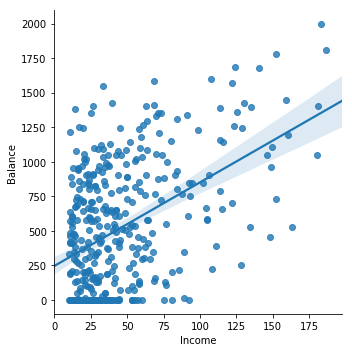

In [91]:
sns.lmplot(x="Income", y="Balance", data=df);

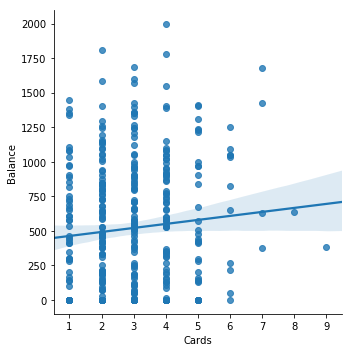

In [86]:
sns.lmplot(x="Cards", y="Balance", data=df);

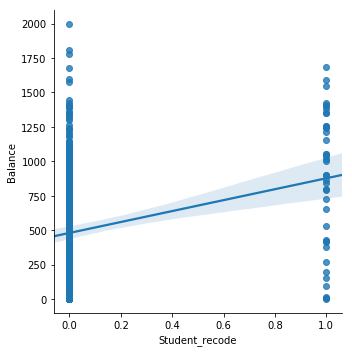

In [85]:
df['Student_recode']=np.where(df['Student']=='Yes',1,0)
sns.lmplot(x="Student_recode", y="Balance", data=df);

Se muestran diferentes tipos de variables, una continua, una discreta y una binaria

## Extra

In [96]:
df['Income_sq'] = df['Income'] ** 2


In [95]:
model4 = smf.ols('Balance ~ Income_sq', data=df)
model4 = model4.fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     103.3
Date:                Tue, 17 Jul 2018   Prob (F-statistic):           9.81e-22
Time:                        21:27:01   Log-Likelihood:                -2973.2
No. Observations:                 400   AIC:                             5950.
Df Residuals:                     398   BIC:                             5958.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    397.7334     23.776     16.729      0.000     350.992     444.475
Income_sq      0.0372      0.004     10.165      0.000       0.030       0.044
==============================================================================
Omnibus:                       48.635   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.783
Skew:                           0.423   Prob(JB):                     6.85e-06
Kurtosis:                       2.156   Cond. No.                     7.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

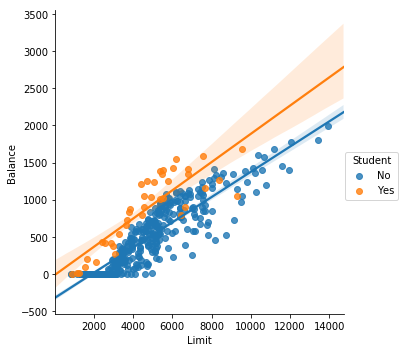

In [98]:
sns.lmplot(x="Limit", y="Balance", data=df, hue="Student");